In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris_dataset/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Processing/Cleaning

In [4]:
print(df.shape)
df.columns

(150, 6)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df = df.drop(columns=["Id"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
len(df[df.duplicated()])

3

### One-Hot Encoding

In [9]:
species_dict = {}

num = 0
for specie in df["Species"].unique():
    species_dict[specie] = num
    num += 1

species_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [10]:
df["Species"].map(species_dict)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [11]:
df["Species"] = df["Species"].map(species_dict)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


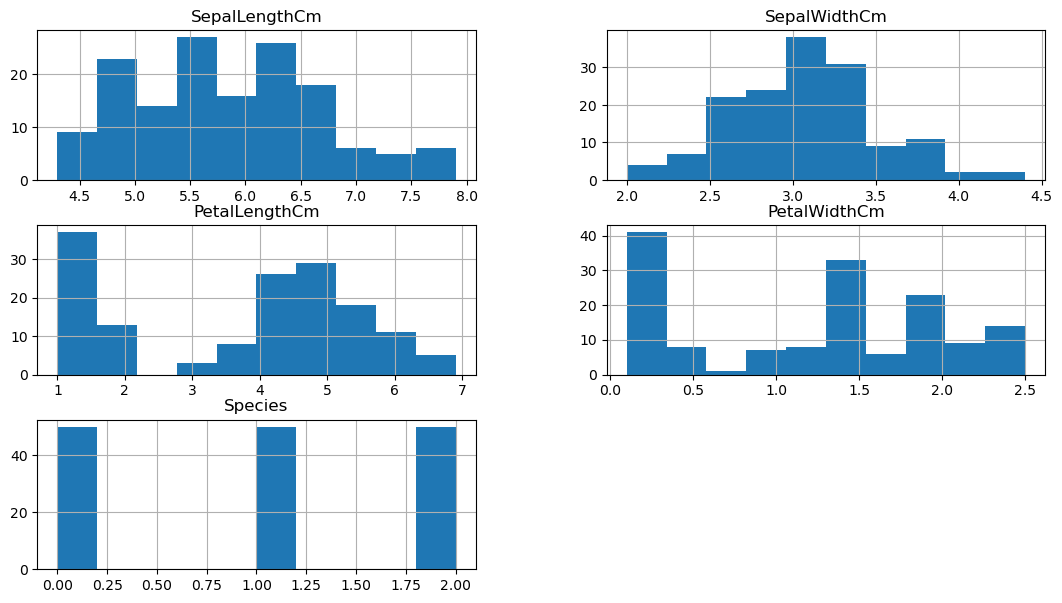

In [12]:
df.hist(figsize=(13, 7))
plt.show()

### Model training

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Species"], axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.values

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


model_params = {
    "log_reg": {
        "model": LogisticRegression(solver="liblinear"),
        "params": {
            "logisticregression__penalty": ["l1", "l2"],
            "logisticregression__C": [1, 10, 100],
        }
    },
    "forest": {
        "model": RandomForestClassifier(),
        "params": {
            "randomforestclassifier__n_estimators": [10, 100, 1000],
            "randomforestclassifier__min_samples_split": [2, 8, 16, 32],
            "randomforestclassifier__max_features": ["sqrt", "log2", None]
        }
    },
    "svm": {
        "model": SVC(gamma="auto", probability=True),
        "params": {
            "svc__C": [1,10,100,1000],
            "svc__kernel": ["rbf", "linear"]
        }
    },
    "tree": {
        "model": DecisionTreeClassifier(splitter="best"),
        "params": {
            "decisiontreeclassifier__min_samples_split": [2, 8, 16, 32],
        }
    },
    "naive_bayes": {
        "model": GaussianNB(),
        "params": {
            "gaussiannb__var_smoothing": np.logspace(0,-9, num=100)
        }
    }
}



In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [17]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp["model"])
    clf = GridSearchCV(pipe, mp["params"], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)

    scores.append({
        "model": algo,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })

    best_estimators[algo] = clf.best_estimator_

model_df = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
model_df

,model,best_score,best_params
0,log_reg,0.942857,"{'logisticregression__C': 100, 'logisticregres..."
1,forest,0.961905,{'randomforestclassifier__max_features': 'log2...
2,svm,0.952381,"{'svc__C': 10, 'svc__kernel': 'linear'}"
3,tree,0.942857,{'decisiontreeclassifier__min_samples_split': 8}
4,naive_bayes,0.933333,{'gaussiannb__var_smoothing': 0.04328761281083...


In [18]:
best_estimators

{'log_reg': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=100, penalty='l1', solver='liblinear'))]),
 'forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(max_features='log2',
                                         min_samples_split=8,
                                         n_estimators=10))]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=10, gamma='auto', kernel='linear', probability=True))]),
 'tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(min_samples_split=8))]),
 'naive_bayes': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB(var_smoothing=0.04328761281083057))])}

In [19]:
y_pred = best_estimators["forest"].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


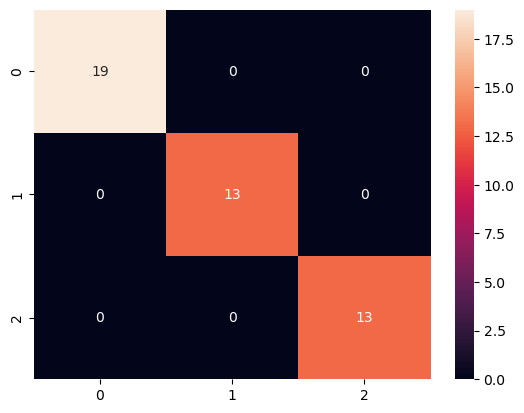

In [20]:
cm = confusion_matrix(y_test, best_estimators["log_reg"].predict(X_test))
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [21]:
import joblib

joblib.dump(best_estimators["log_reg"], "classifier.pkl")

['classifier.pkl']

In [22]:
num_to_specie = {v:k for k,v in species_dict.items()}
num_to_specie

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [23]:
import json

with open("num_to_specie_dict.json", "w") as f:
    f.write(json.dumps(num_to_specie))